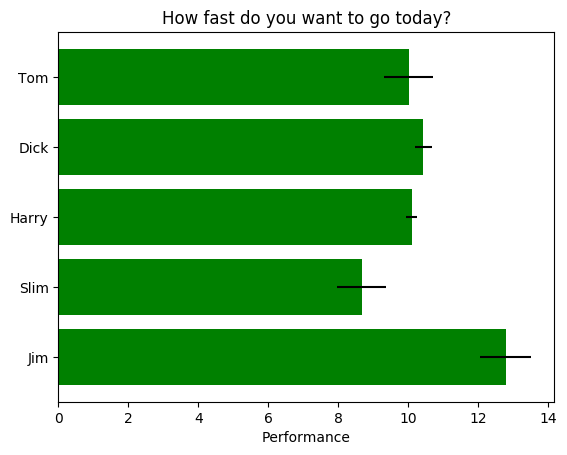

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

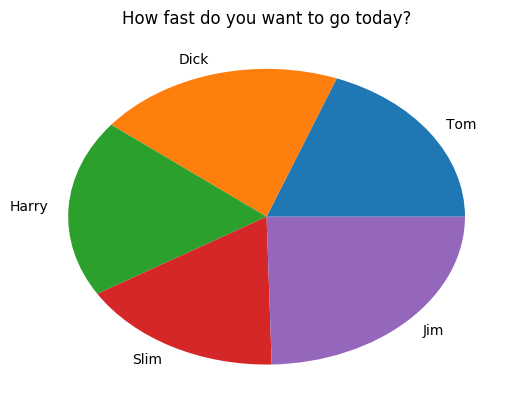

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


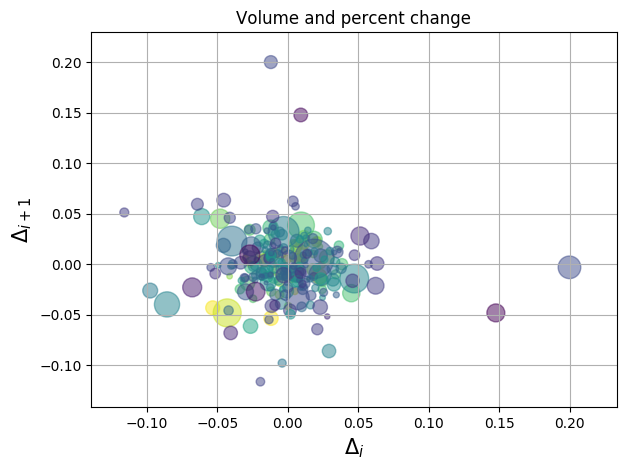

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

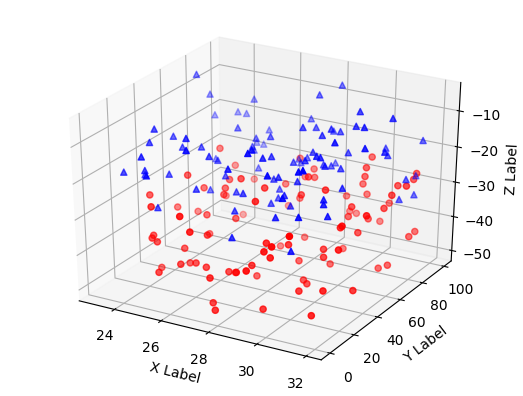

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Plot Assignment

Draw 3 plots with data used in Module 2's notebook.



In [0]:
# copy yesterday's work to import and clean up data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from itertools import repeat
from statsmodels.graphics.mosaicplot import mosaic 



In [0]:
census_income_location =  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep='\s*,\s*',  encoding="utf-8-sig",
                                     engine='python')

census_income = census_income_location
column_names = list(census_income)


def Encoding():
  ''' Takes a column name and parses it for object type data to 
      encode into an integer type data. In short a transform from categorical
      to integer. Please have a listing of column heading names available to
      input when asked
  '''
  
  
  #TODO : Find a way to iterate all columns in a dataframe, removing user input
  n = input(str("Please select a column name"))
  n = n.replace(" ", "") # this is broken, i dont know why, it just does not 
  # strip the white space properly from input, resulting in an exception
  # TODO : Standardize user input to remove exceptions
  le = LabelEncoder()
  for value in census_income.columns:
    if census_income[n].dtype == object:
      census_income[n] = le.fit_transform(census_income[n])
    else:
      pass

for x in repeat(None, 9):
  Encoding()


In [1]:
census_income.head(50)

NameError: ignored

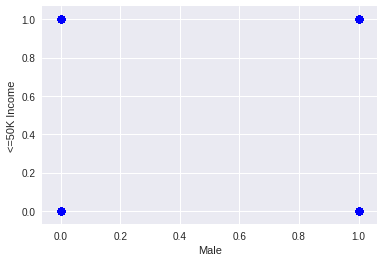

In [77]:
# Scatterplot for gender vs income

data = {'a' : census_income['Male'],
        'b' : census_income['<=50K'] }

# random color init
color = np.random.randint(0, 200, 32560)

plt.scatter('a', 'b', c='blue', data=data)
plt.xlabel('Male')
plt.ylabel('<=50K Income')
plt.show()
       
# as you might imagine....a set of data that has the same values repeating
# tens of thousands of times is not really good to be used in a scatterplot
# The only four points we have are that yes, you can be male or not male, 
# and yes, you can make more or lessthanequal to 50K. 
# What would have made this more interesting is if we had the exact income amount
# rather than a binary value

# There is an large positive correlation between the amusement of this 
# graph and it's lack of usefulness ;)


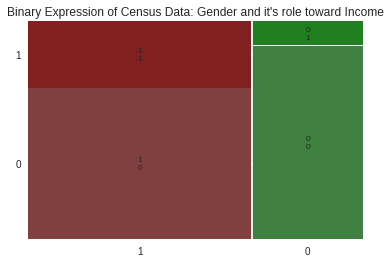

In [76]:
%matplotlib inline
mosaic(census_income, [ 'Male' , '<=50K'], axes_label=True, 
       title="Binary Expression of Census Data: Gender and it's role toward Income");





In [0]:

'''

The graph starts by plotting the first variable Male at the by splitting the two blocks
across a vertical line. The left block represents the larger male pop. and the 
right blocks represent the smaller female pop.

Immediately you can see right away that roughly 3/5ths of those population is 
male that has been surveyed. So there is immediately a bit of bias there.

Next, the binary expression of 1 is mapped
across the horizontal axis, 1 being more than 50K income, and zero being less
than 50k income is mapped across the top, noting that overall the amount of 
folk making less than 50K is much higher than those making more than 50K. 

The solid blocks then represent a gender making more than 50K.
1,0 is the largest block of non 50k earners, followed by 0,0
while 1,1 makes a proportionately slightly larger increase than 0,1.

I'll leave my comments to myself, as I have not represented any other factors,
accounted for bias for either variable.

'''

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:3261: RuntimeWarning: Second argument 'c' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


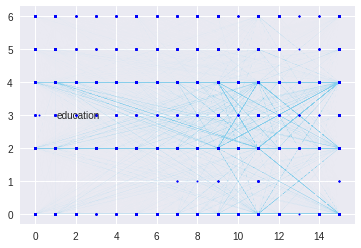

In [99]:
# Multi-Line Graph

%matplotlib inline
education = census_income['Bachelors']
demo = census_income['White']
gender = census_income['Male']
target = census_income['<=50K']
occupation = census_income['Adm-clerical']
marriage = census_income['Never-married']

data = {'x': education, 'y': demo, 'z': gender, 'a' : target, 'b' : occupation, 
        'c': marriage }


#plt.plot( 'b', 'c', data=data, marker='o', markerfacecolor='green', markersize=2, color='black', linewidth=.002, label='occupation')
plt.plot( 'x', 'c', data=data, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=.001, label='education')
#plt.plot( 'y', 'c', data=data, marker='^', color='olive', linewidth=.02, label='skin-color')
#plt.plot( 'z', 'a', data=data, marker='p', color='purple', linewidth=.02, linestyle='dashed', label='gender')
plt.legend();


In [0]:
# Welcome to the spider chart. 
# The density of the web implies a casual relationship between variables
# for those variables

# heavier clustering takes place at 9, 2 than anywhere else so let's see what 
# those values are...i should make a lookup table << TODO : 

# 9, 2 = is married with a bachelor's degree
# 11, 2 = married with a high school diploma
# 15, 4   = some college never married

# also to note is the solidification of the web on the 2 and 4 on the y axis
# indicating that the majority of people are married or never married. Neat.
# At this time period that is